(3603, 2)


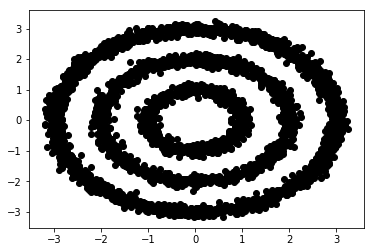

53
53
[{3, 4, 5, 6, 7, 8, 10, 13, 19, 20, 23, 24, 29, 34, 40, 46, 48}, {32, 38, 39, 41, 45, 14, 15, 49, 22, 25, 27, 28}, {50}, {51}, {0, 1, 2, 9, 11, 12, 16, 17, 18, 21, 26, 30, 31, 33, 35, 36, 37, 42, 43, 44, 47, 52}]


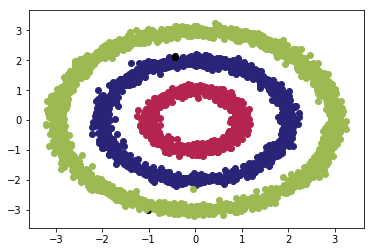

save ok
finish all in 31.254475999999983


In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.nonparametric.api as smnp
import math
import copy
import time
from sklearn.cluster import DBSCAN
#from skimage import exposure,data
from pandas import Series, DataFrame
import random
from collections import Counter
from itertools import permutations, combinations
#from sklearn.datasets import load_iris
#dataSet = load_iris().data
#dataSet = np.loadtxt('788points.txt')
dataSet = np.loadtxt('ThreeCircles.txt')
#dataSet = np.loadtxt('spiral.txt')
#dataSet = np.loadtxt('julei1.txt')
print(dataSet.shape)
plt.scatter(dataSet[:,0],dataSet[:,1],color='black',label='aa')
plt.show()
dist_List=[]
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color
def dist(a,b):
    """
    :param a: 样本点
    :param b: 样本点
    :return: 两个样本点之间的欧式距离
    """
    return math.sqrt(math.pow(a[0]-b[0],2) + math.pow(a[1]-b[1],2)) 
def CalculateDistMatrix(dataset):
    """
    :param dataset: 数据集
    :return: 距离矩阵
    """
    DistMatrix = [[0 for j in range(len(dataset))] for i in range(len(dataset))]
    #Dist_List = []
    for i in range(len(dataset)):
        for j in range(len(dataset)):
            DistMatrix[i][j] = dist(dataset[i], dataset[j])
            dist_List.append(DistMatrix[i][j])
    return DistMatrix
def Dist_All_Calculater():
    #首先最好计算出所有点的距离，这样能够有效的避免重复计算增加的复杂度
    Dist_List = CalculateDistMatrix(dataSet)
    Dist_array = np.array(Dist_List)
    return Dist_array
#计算随机点的距离 形成距离矩阵
def append_random_Dist(rand_int):
    DistMatrix = [[0 for j in range(len(rand_int))] for i in range(len(rand_int))]
    #Dist_List = []
    for i in range(len(rand_int)):
        for j in range(len(rand_int)):
            DistMatrix[i][j] = DistArray_All[rand_int[i]][rand_int[j]]
            #Dist_List.append(DistArray_All[rand_int[i]][rand_int[j]])
    return DistMatrix
def kde_test(data, kernel, bw, gridsize, cut):
    fft = kernel == "gau"
    kde = smnp.KDEUnivariate(data)
    kde.fit(kernel, bw, fft, gridsize=gridsize, cut=cut)
    return kde.support, kde.density
def gradient_kde(datax,datay):
    min_gra = []#鞍部
    max_gra=[]#第一个波峰
    max_gra_second=[]#第二个波峰
    maxList=[]
    minList=[]
    for i in range(len(datax)-2):
        gradient1 = (datay[i+1]-datay[i])/(datax[i+1]-datax[i])
        gradient2 = (datay[i+2]-datay[i+1])/(datax[i+2]-datax[i+1])
        if((gradient1>=0)&(gradient2<=0)):
            max_single=[]
            max_single.append(datax[i+1])
            max_single.append(datay[i+1])
            maxList.append(max_single)
        if((gradient1<=0)&(gradient2>=0)):
            min_single=[]
            min_single.append(datax[i+1])
            min_single.append(datay[i+1])
            minList.append(min_single)
    max_gra=maxList[0]
    maxList.remove(maxList[0])
    maxList = sorted(maxList,key=lambda x:x[1],reverse=True)
    max_gra_second=maxList[0]
    index_max=max_gra_second[1]
    now_min=index_max
    for n in minList:
        if((index_max-n[1])<=0):
            continue
        else:
            if((index_max-n[1])<now_min):
                now_min=(index_max-n[1])
                min_gra=n
    #取最高的两峰和中间的一峰
    return min_gra[0],max_gra[0],max_gra_second[0]
def draw_plot2(data,kernel,bw,gridsize,cut):
    kdefit_x, kdefit_y = kde_test(data,kernel,bw,gridsize=gridsize,cut=cut)
    #plt.plot(kdefit_x, kdefit_y,color='k',label='sads')
    #plt.show()
    #寻找鞍部
    #寻找类内峰值
    min_gra,max_gra,max_gra_second = gradient_kde(kdefit_x,kdefit_y)
    return min_gra,max_gra,max_gra_second
def kde_All():
    kernel='gau'
    bw="scott"
    gridsize = 40
    cut = 2
    max_dist,middle_dist,sencond_maxdist = draw_plot2(dist_List,kernel,bw,gridsize,cut)
    return max_dist,middle_dist,sencond_maxdist
def kde_center(data):
    kernel='gau'
    bw="scott"
    gridsize = 80
    cut = 2
    max_dist,middle_dist,sencond_maxdist = draw_plot2(data,kernel,bw,gridsize,cut)
    return middle_dist
def gradient_set2(datalist):
    #方案1:最高峰值
    max_index=0
    max_outindex=0
    #max_gradient =datalist[1]-datalist[0]
    max_gradient =0
    #gradient=[]
    for i in range(len(datalist)-5):
        gradient_single = datalist[i+1]-datalist[i]
        #gradient.append(gradient_single)
        if(gradient_single>max_gradient):
            if((i>5)):
                max_gradient=gradient_single
                max_index=i
                max_outindex=i+1
    #plt.plot(gradient)
    #plt.show()
    #print(max_index)
    return max_index,max_outindex
def entry(datalist):
    #先对这一行的距离排序
    datalist = sorted(datalist,reverse=False)
    #plt.plot(datalist)
    #plt.show()
    #然后计算其斜率
    max_index,max_outindex = gradient_set2(datalist)
    fast_dist = datalist[max_index]
    outfast_dist=datalist[max_outindex]
    #average_a = np.mean(outcluster_dist)
    return fast_dist,outfast_dist
def set_group(list_a):
    tgt = []
    # 遍历所有元素，进行分组
    for i, x in enumerate(list_a):
        z = x  # 暂存当前元素
        flag = []  #
        # 如果目标库不为空，遍历目标库，看是否存在有交集的元素
        if len(tgt) > 0:
            for j, y in enumerate(tgt):
                # 判断是否存在交集
                if z.intersection(y):
                    z = z.union(y)
                    # 若存在并集，则将当前元素记录
                    flag.append(j)
                    # 如果存在已有的元素，删除原有的元素
            if len(flag) > 0:
                flag.reverse()  # 之所以要倒排一下，是防止list删除元素后的遍历异常
                for k in flag:
                    tgt.pop(k)
        tgt.append(z)
    return tgt
def findNeighbor(i,point_list,eps):
    neighborlist=[]
    sumDist=0
    n=0
    average=0
    while(n<len(point_list)):
        if(DistArray_All[i][point_list[n]]<=eps):
            neighborlist.append(point_list[n])
            sumDist+=DistArray_All[i][point_list[n]]
        n+=1
    if len(neighborlist)>0:
        average = sumDist/len(neighborlist)
    #average=np.mean(neighbordistlist)
    return neighborlist,average
def randomSet(max_dist,middle_dist,second_maxdist):
    shape = dataSet.shape[0]
    info_lists = [[0 for j in range(4)] for i in range(shape)]
    point_list = [0 for i in range(shape)]
    n=0
    clusterCenter=[]#存放所有疑似中心点的集合
    for i in range(shape):
        info_lists[i][0]=i #原始的序号
        info_lists[i][1]=-1 #表示没有被聚类
        dist_list=DistArray_All[i].tolist() #代表该点到其他点的距离
        eptsDist,outDist=entry(dist_list) #求出关键的参数
        info_lists[i][2]=eptsDist #类内最大距离
        x1=abs(max_dist-outDist) #中心点指标1
        x2=abs(middle_dist-eptsDist) #中心点指标2
        quoto = x1+x2
        info_lists[i][3]=quoto #指标按照1+2计算
    #排序 按照指标由小到大排序
    info_lists = sorted(info_lists,key=lambda x:x[3],reverse=False)
    for i in range(len(info_lists)):
        point_list[i]=info_lists[i][0] #没有访问的节点
    #开始聚类
    #时间复杂度O(LogN)
    clusters=[]
    cluster_centers=[]
    cluster_averageIndex=[]
    while(len(point_list)>0):
        point_now_cluster=[]#当前类中已经访问的点,保存每个类都有谁
        i = point_list[0]#这个点是类的起始点
        #计算eps就行
        data = [data for data in info_lists if data[0]==i]
        eps = data[0][2]#eps是类内两点间的平均距离
        point_list.remove(i)
        point_now_cluster.append(i)
        NeighborPts,avergae=findNeighbor(i,point_list,eps)
        for m in NeighborPts:
            point_list.remove(m)
            point_now_cluster.append(m)
        if(len(point_now_cluster)>0):
            clusters.append(point_now_cluster)
            cluster_centers.append(i)
            cluster_averageIndex.append(avergae)
    print(len(clusters))
    out_cluster_all=[]
    #时间复杂度O（N）
    for i in range(len(clusters)):
        outher_cluster_dist=[]
        numbers = len(clusters[i])
        scope = int(numbers*0.1)
        if(scope==0):
            scope=1
        for m in cluster_centers:
            other_cluster=[]#A->m类的集合
            for j in range(numbers):
                if(m==(cluster_centers[i])):
                    continue
                else:
                    out_dist_list_single=[]
                    out_dist_list_single.append(cluster_centers[i])
                    out_dist_list_single.append(m)
                    out_dist_list_single.append(clusters[i][j])
                    out_dist_list_single.append(DistArray_All[m][clusters[i][j]])#点和外类中心的距离
                    other_cluster.append(out_dist_list_single)#A与B的所有距离的合集
                #选取本类的3%个点加入
                #排序
                other_cluster = sorted(other_cluster,key=lambda x:x[3],reverse=False)
                other_cluster = other_cluster[0:scope]#a->m类的前3%个
            outher_cluster_dist.append(other_cluster)#A的所有的外类中心距离的合集 前5%
        out_cluster_all.append(outher_cluster_dist)#所有类中心的集合
    #计算类间的粘合度系数
    #排列的
    cluster_index_list =list(range(0,len(cluster_centers)))
    un_fidelty = list(combinations(cluster_index_list,2))#没有访问的类组合
    tgt=[]
    for ever_cluster_index in un_fidelty:
        tgt_single=set()
        Info_X = out_cluster_all[ever_cluster_index[0]][ever_cluster_index[1]]
        Info_Y = out_cluster_all[ever_cluster_index[1]][ever_cluster_index[0]]
        a=cluster_averageIndex[ever_cluster_index[0]]  #X
        b=cluster_averageIndex[ever_cluster_index[1]]   #Y
        count1=0
        count2=0
        X = list(range(0,len(Info_X)))
        Y = list(range(0,len(Info_Y)))
        while(len(X)!=0):
            n=X[0]
            X.remove(n)
            for m in Info_Y:
                if(DistArray_All[m[2]][Info_X[n][2]]<=a):
                    count1+=1
                    break
        while(len(Y)!=0):
            n=Y[0]
            Y.remove(n)
            for m in Info_X:
                if(DistArray_All[m[2]][Info_Y[n][2]]<=b):
                    count2+=1
                    break
        quo1=count1/len(Info_X)
        quo2=count2/len(Info_Y)
        #print(quo1)
        
        #m=1/0
        #average_part = np.mean(dist_listas)
        if((quo1>0.6)&(quo2>0.6)):
        #if((average_part<=a)&(average_part<=b)):
            tgt_single.add(ever_cluster_index[0])
            tgt_single.add(ever_cluster_index[1])
            tgt.append(tgt_single)
    #合并类
    #先加上所有类 防止漏掉没有聚类成功的
    print(len(cluster_centers))
    for i in range(len(cluster_centers)):
        tgt_single=set()
        tgt_single.add(i)
        tgt.append(tgt_single)
    #找最大并集
    list_tgt = set_group(tgt)
    #把这个画一下看看
    print(list_tgt)
    #输出一下
    originallList = [0 for i in range(shape)]
    indexofcluster=0
    for m in list_tgt:
        randint_scatterxy1 = []
        colorrr = randomcolor()
        for n in m:
            for j in clusters[n]:
                randint_scatterxy1.append(dataSet[j].tolist())
                originallList[j]=indexofcluster
        scatter = np.array(randint_scatterxy1)
        if(len(scatter)<3):
            plt.scatter(scatter[:,0],scatter[:,1],color='black',label='aa')
        else:
            plt.scatter(scatter[:,0],scatter[:,1],color=colorrr,label='aa')
        indexofcluster=indexofcluster+1
    plt.show()
    #f = "twomoons_result_lw.txt"
    #with open(f,"w") as file: 
    #    for m in range(len(list_tgt)):
    #        for n in list_tgt[m]:
    #            for j in clusters[n]:
    #                file.write(str(m) + "   " + str(j) +"\n")
    np.savetxt('threecircles_result_lw.txt',originallList,fmt="%d")
    print('save ok')
start = time.clock()
DistArray_All = Dist_All_Calculater()
#通过kde获取到大概的范围
max_dist,middle_dist,second_maxdist = kde_All()
randomSet(max_dist,middle_dist,second_maxdist)
end = time.clock()
print('finish all in %s' % str(end - start))